In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Users\Prapti\OneDrive\Desktop\DSBDA labs\datasets\student performance.csv")

In [3]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


In [5]:
df['math score']


0      59
1      96
2      57
3      70
4      83
       ..
995    77
996    80
997    67
998    80
999    58
Name: math score, Length: 1000, dtype: int64

In [7]:
print(df['math score'].skew())


-0.2812004329478628


In [9]:
print(df['reading score'].skew())

-0.18350548645836867


In [11]:
print(df['writing score'].skew())

-0.2145739006187218


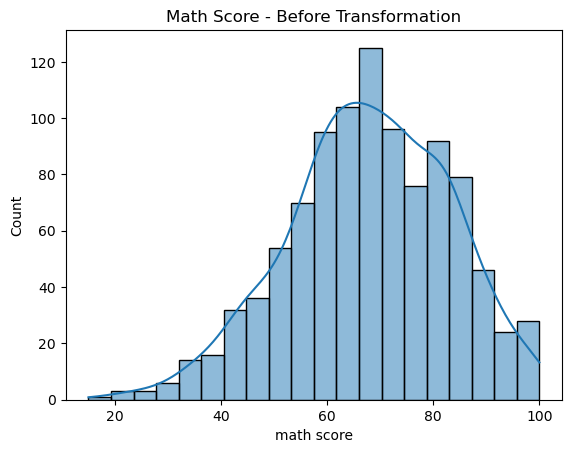

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['math score'], kde=True)
plt.title("Math Score - Before Transformation")
plt.show()


In [15]:
import numpy as np
df['math_log'] = np.log1p(df['math score'])     # log1p means log(1 + x), handles 0
                                                # fixes the right skedwed data 

In [17]:
df['math_sqrt'] = np.sqrt(df['math score'])     # fix the right skewed data 
 

In [19]:
from scipy.stats import boxcox
df['math_boxcox'], _ = boxcox(df['math score'] + 1)      # can fix both right & left skewness


In [21]:
print("Original:", df['math score'].skew())
print("Log:", df['math_log'].skew())
print("Sqrt:", df['math_sqrt'].skew())
print("Box-Cox:", pd.Series(df['math_boxcox']).skew())


Original: -0.2812004329478628
Log: -1.1561386708920394
Sqrt: -0.6663802359417723
Box-Cox: -0.04357732895218171


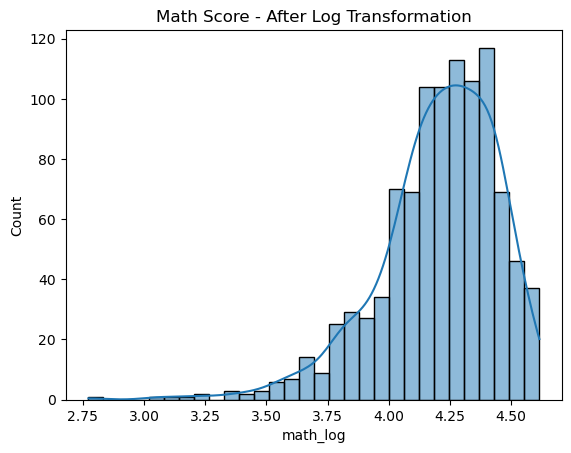

In [23]:
sns.histplot(df['math_log'], kde=True)
plt.title("Math Score - After Log Transformation")
plt.show()


In [25]:
df['math_square'] = df['math score'] ** 2        # fix the left skewed data 
print(df['math_square'].skew())


0.29872756408637013


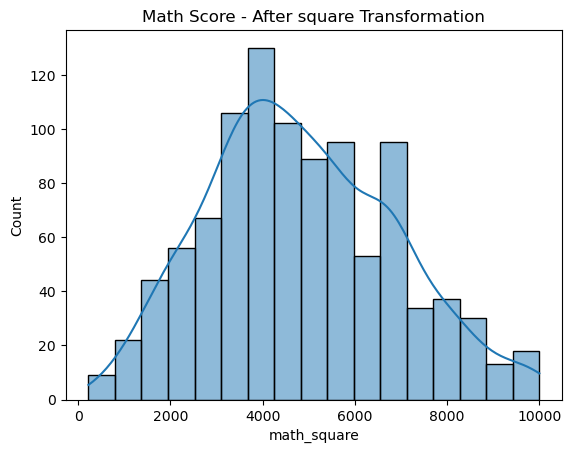

In [27]:
sns.histplot(df['math_square'], kde=True)
plt.title("Math Score - After square Transformation")
plt.show()


In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['mathscore_scaled'] = scaler.fit_transform(df[['math score']])


In [31]:
df['math score']

0      59
1      96
2      57
3      70
4      83
       ..
995    77
996    80
997    67
998    80
999    58
Name: math score, Length: 1000, dtype: int64

In [35]:
df['mathscore_scaled']

0      0.517647
1      0.952941
2      0.494118
3      0.647059
4      0.800000
         ...   
995    0.729412
996    0.764706
997    0.611765
998    0.764706
999    0.505882
Name: mathscore_scaled, Length: 1000, dtype: float64

In [37]:
df['mathscore_scaled'].min()


0.0

In [43]:
df['mathscore_scaled'].max()


1.0